In [1]:
# ! pip install stats
# ! pip install matplotlib
# ! pip install scipy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy


## Concepts/terminology 
**Statistics**
* A random experiment: "an experiment or a process for which the outcome cannot be predicted with certainty"
* Sample space v.s. Event
* Random Variables: "quantities of interest that are determined by the result of the experiment are known as random variable"


**Probability**
* Probability of an event
* Joint probability v.s Conditional probability
* Bayes Rule: "how you should change your existing beliefs in the light of new occurrence"
    + $Pr(\text{cancer=True} | \text{Test=Positive}) = \frac{Pr(\text{cancer=True}) Pr(\text{Test=Positive}|\text{cancer=True})}{Pr(\text{Test=Positive})}$
    + It can be used to calculate unknown poterior probability [in some cases](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/#:~:text=It%20is%20often%20the%20case,\)%20*%20P\(not%20A\))
    + How does this Bayes rule help use build ML models?
    parameters; data

    maximize Pr(parameters|data)
    
    maximize Pr(data|parameters) * Pr(parameters) 


**Reference**
* Introduction to Probability and Statistics for Engineers and Scientists

## Random Variables

In [ ]:
# Random Number Generation (continuous)

# Random Number Genration (discrete)
probs = (1/6, 1/6,1/6, 1/6, 1/6, 1/6)
x = [1,2,3,4,5,6]#np.arange(1, len(probs)+1)

# Plot Probability Distribution Function
fig, axes = plt.subplots(1, 1)
axes.bar(x, probs)
axes.set_xlabel('X')

# Plot Cumulative Distribution Function
# cumulated_probs = stats.rv_discrete(values=(x, probs)).cdf(x) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html
# cumulated_probs = []
# cumulated_p = 0
# for p in probs:
#     cumulated_p += p
#     cumulated_probs.append(cumulated_p)
# fig, ax = plt.subplots(1, 1)
# ax.plot(x, cumulated_probs, marker='o', markerfacecolor='r', linestyle='None', markersize=10, markeredgecolor='r') # fnid more parameters here: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set
# ax.vlines(x, 0, cumulated_probs, colors='r', linewidth=4) 


## Common Distributions

In [ ]:
# Bernoulli distribution


# Uniform distribution

# Normal distribution


## Central Limit Theorem

if you have a population with mean and standard deviation and take sufficiently large random samples from the existing population, then the distribution of the sample means will be approximately normally distributed.

In [ ]:
 # number of sample
num = [1, 10, 50, 100] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    x = [np.mean(
        [np.random.uniform() for _ in range(j)]) for _i in range(1000)]
    means.append(x)
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

## Data Wrangling
* Identifying and correcting errors and inconsistencies in the data 
* Handling missing or incomplete values 
* Combining multiple datasets 
* Converting the data into a format that is suitable for analysis 
* Identifying and removing outliers 
* Normalizing the data 
* Aggregating the data into useful summary statistics 

## Image and Text

In [ ]:
# represent image in a numerical vector of features: e.g., color, shapes, texture, brightness of multiple (say 135) sliced windows of a image

# repesent text with BOW

# What are some of its limitations?

## Pass Activity

In [11]:
# Read "train_wbcd.csv" and print the feature name with numbers of missing entries.
import pandas as pd
df = pd.read_csv('data/train_wbcd.csv')
for col_name in df.columns:
    if df[col_name].isnull().sum() > 0:
        print(col_name, df[col_name].isnull().sum())



f21 2


In [12]:
# (2pm - 4pm workshop) Fill in the missing entries. For filling any feature, you can use either the mean or median value of the feature values 
# from observed entries. Explain the reason behind your choice and print replacement value of each feature.

m1 = df['f21'].mean()
m2 = df['f21'].median()
print('Median(m2): ', m2)
indices_for_na = list(df[df['f21'].isnull()].index)
print(indices_for_na)             
print('Before Fillna')
print(df['f21'][indices_for_na])

df2 = df.fillna(value=m2)
print(df2['f21'][indices_for_na])

Median(m2):  15.315
[70, 74]
Before Fillna
70   NaN
74   NaN
Name: f21, dtype: float64
70    15.315
74    15.315
Name: f21, dtype: float64


In [13]:
# # (4pm - 6pm workshop) Fill in the missing entries. For filling any feature, you can use either the mean or median value of the feature values 
# from observed entries. Explain the reason behind your choice and print replacement value of each feature.
m1 = df['f21'].mean()
m2 = df['f21'].median()
print(m2)


indices_for_null = list(df['f21'][df['f21'].isnull()].index)
print('Before fillna.')
print(df['f21'][indices_for_null])

print('After fillna.')
df2 = df.fillna(value=m2)
print(df2['f21'][indices_for_null])


15.315
Before fillna.
70   NaN
74   NaN
Name: f21, dtype: float64
After fillna.
70    15.315
74    15.315
Name: f21, dtype: float64


In [14]:
# Encode the categorical variable "Diagnosis" using an appropriate encoding approach and display the encoded values. 
# Justify your selection of encoding approach.  Save the modified data into a csv file. Upload this new file with your submission in OnTrack.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()
ord_encoder = OrdinalEncoder()


In [16]:
# print('Original: ', df['Diagnosis'])
# sparse_output = one_hot_encoder.fit_transform(df['Diagnosis'].to_numpy().reshape(-1, 1))
# print(type(sparse_output))
# print("One hot: ", sparse_output.toarray())
sparse_output = ord_encoder.fit_transform(df['Diagnosis'].to_numpy().reshape(-1, 1))
print('Ordinal: ', sparse_output)


# One hot
# B: [1, 0, 0]
# M: [0, 1, 0]
# N: [0, 0, 1]

# ordinal
# B, M, N
# 0, 1, 2

Ordinal:  [[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [17]:
df["Diagnosis"].astype('category').cat.codes

0     0
1     1
2     0
3     0
4     0
     ..
95    1
96    1
97    0
98    0
99    0
Length: 100, dtype: int8

In [ ]:
# Apply the min-max scaling on features f1 to f30. Plot distribution of first six features before and after scaling.
# Is there any difference? Please explain. 

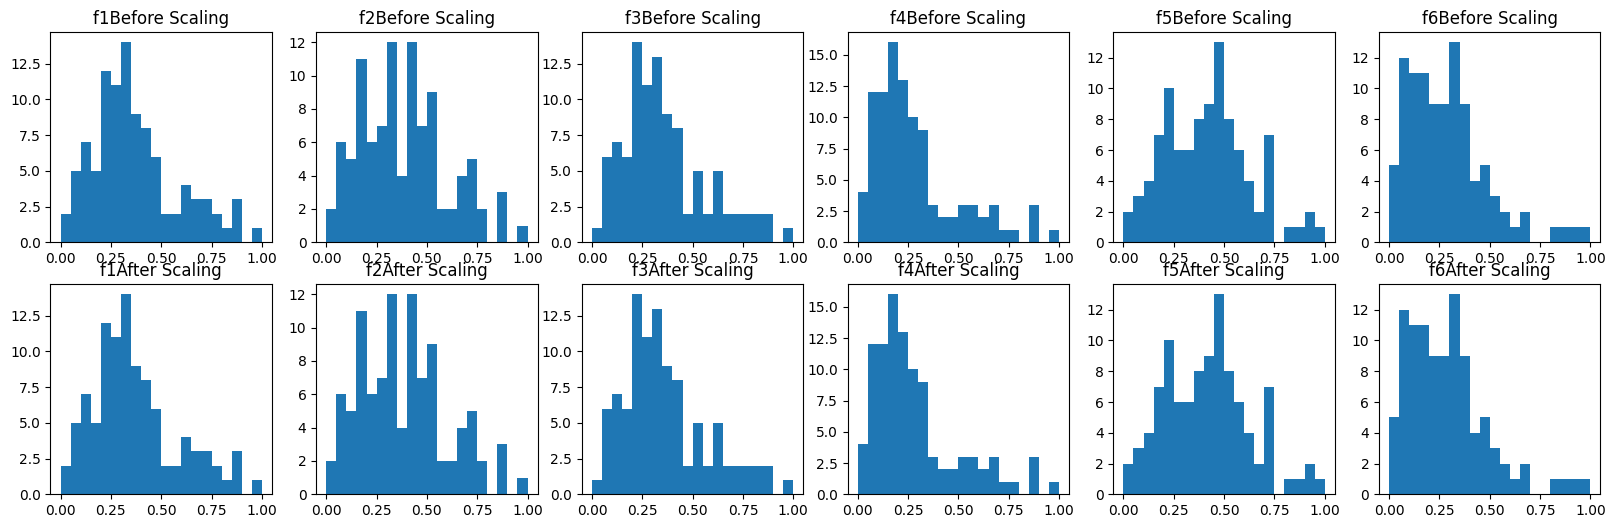

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['f'+str(i) for i in range(1,31)]] = scaler.fit_transform(df[['f'+str(i) for i in range(1,31)]])


fig, axs = plt.subplots(2,6, figsize=(20,6))

for i in range(6):
    axs[0,i].set_title('f'+str(i+1)+'Before Scaling') 
    axs[0,i].hist(df['f'+str(i+1)], bins=20)
    axs[1,i].set_title('f'+str(i+1)+'After Scaling')
    axs[1,i].hist(df['f'+str(i+1)], bins=20)
plt.show()
  
